# Shark Bite Analysis

Using date from [Australian Shark-Incident Database](https://github.com/cjabradshaw/AustralianSharkIncidentDatabase) to analyze shark bite data.

## Questions

**Questions for `activityData-cleaned.csv`**

1. How many shark bites are there in the data set?
2. What percentage of those bites were fatal?
3. What are the different options for `Activity`?
4. How many bites were there for each `Activity`?
5. What percentage of bites were fatal for each `Activity`?
6. Are provoked or unprovoked bites more likely to be fatal?
7. What was the earliest year in the data set?
8. What was the latest year in the data set?
9. How many years of data are there?
10. Graph the number of bites per year.
11. Graph the number of data bites for each year.

**Questions for `injurydat-cleaned.csv`**

1. How many shark bites are there in the data set?
2. What shark species was involved in the most bites?
3. What shark species was involved in the most fatal bites?
4. Were more women or men involved in shark attacks?
5. What is the average length of sharks involved in bites?
6. What is the average length of a shark involved in non-fatal bites as compared to that of fatal bites?
7. What is the average length of a shark involved in bites that were provoked as compared to that of bites that were unprovoked?
8. Are the types of sharks involves in swimming and surfing bites different than those involved in diving bites?
9. Are the types of sharks involved in fatal bites different than those involved in non-fatal bites?

In [4]:
import requests
import pandas as pd

In [5]:
df = pd.read_csv('activityData-cleaned.csv')
df.sample(20)

,incident_year,recovery_status,provoked_unprovoked,victim_activity
267,1929.0,injured,provoked,snorkelling
490,1959.0,uninjured,provoked,spearfishing
791,2004.0,injured,provoked,spearfishing
1158,2020.0,fatal,unprovoked,boarding
667,1992.0,uninjured,provoked,NaN
1118,2019.0,injured,NaN,snorkelling
857,2008.0,injured,unprovoked,other: standing in water
777,2003.0,fatal,unprovoked,swimming
202,1919.0,fatal,unprovoked,swimming
105,1893.0,fatal,unprovoked,swimming


In [6]:
df.dtypes

incident_year          float64
recovery_status         object
provoked_unprovoked     object
victim_activity         object
dtype: object

In [10]:
# How many shark bites are there in the data set?

df.shape

#There are 1203 shark bites in this dataset
#df.tail()


(1204, 4)

In [11]:
# What percentage of those bites were fatal?
df.recovery_status.value_counts(normalize=True)

#20 percent of those bites were fatal

injured      0.603679
fatal        0.209030
uninjured    0.186455
Injured      0.000836
Name: recovery_status, dtype: float64

In [12]:
# What are the different options for Activity?
df.victim_activity.value_counts()

swimming                    451
boarding                    281
snorkelling                 127
spearfishing                118
diving                       91
fishing                      37
unmotorised boating          31
other: standing in water     24
surfing                       3
motorised boating             2
scuba diving                  2
other:floating                2
standing                      1
wading                        1
Name: victim_activity, dtype: int64

In [15]:
# How many bites were there for each Activity?
df.groupby('victim_activity').incident_year.count()

victim_activity
boarding                    281
diving                       91
fishing                      37
motorised boating             2
other: standing in water     24
other:floating                2
scuba diving                  2
snorkelling                 127
spearfishing                118
standing                      1
surfing                       3
swimming                    451
unmotorised boating          31
wading                        1
Name: incident_year, dtype: int64

In [21]:
# What percentage of bites were fatal for each Activity?
df.groupby('victim_activity').recovery_status.value_counts(normalize=True)

victim_activity           recovery_status
boarding                  injured            0.555160
                          uninjured          0.345196
                          fatal              0.096085
                          Injured            0.003559
diving                    injured            0.439560
                          uninjured          0.340659
                          fatal              0.219780
fishing                   injured            0.810811
                          uninjured          0.189189
motorised boating         injured            0.500000
                          uninjured          0.500000
other: standing in water  injured            0.916667
                          fatal              0.083333
other:floating            injured            1.000000
scuba diving              injured            1.000000
snorkelling               injured            0.724409
                          fatal              0.220472
                          uninjured     

In [42]:
df_fatal = df[df.recovery_status == 'fatal']
percent_fatals = df_fatal.victim_activity.value_counts(normalize=True)
percent_fatals * 100

swimming                    63.934426
snorkelling                 11.475410
boarding                    11.065574
diving                       8.196721
spearfishing                 4.508197
other: standing in water     0.819672
Name: victim_activity, dtype: float64

In [46]:
# Are provoked or unprovoked bites more likely to be fatal?
df.groupby('recovery_status').provoked_unprovoked.value_counts()

#Unprovoked bites are more likely to be fatal.

recovery_status  provoked_unprovoked
Injured          unprovoked               1
fatal            unprovoked             197
                 provoked                53
injured          unprovoked             458
                 provoked               261
uninjured        unprovoked             138
                 provoked                84
Name: provoked_unprovoked, dtype: int64

In [48]:
# What was the earliest year in the data set?

df.sort_values(by='incident_year')

#Earliest record is of 1791

,incident_year,recovery_status,provoked_unprovoked,victim_activity
0,1791.0,fatal,unprovoked,swimming
1,1803.0,injured,unprovoked,swimming
2,1807.0,injured,unprovoked,swimming
3,1820.0,fatal,provoked,swimming
4,1825.0,injured,unprovoked,swimming
...,...,...,...,...
1199,NaN,NaN,NaN,NaN
1200,NaN,NaN,NaN,NaN
1201,NaN,NaN,NaN,NaN
1202,NaN,NaN,NaN,NaN


In [49]:
# What was the latest year in the data set?
df.sort_values(by='incident_year', ascending=False)

#2022 is the latest year in the dataset

,incident_year,recovery_status,provoked_unprovoked,victim_activity
1195,2022.0,uninjured,unprovoked,surfing
1194,2022.0,injured,unprovoked,wading
1193,2022.0,injured,unprovoked,scuba diving
1192,2022.0,injured,unprovoked,other:floating
1191,2022.0,injured,unprovoked,other:floating
...,...,...,...,...
1199,NaN,NaN,NaN,NaN
1200,NaN,NaN,NaN,NaN
1201,NaN,NaN,NaN,NaN
1202,NaN,NaN,NaN,NaN


In [56]:
# How many years of data are there?
df.groupby('incident_year').count()

#There is data available for 175 years

,recovery_status,provoked_unprovoked,victim_activity
incident_year,,,
1791.0,1,1,1
1803.0,1,1,1
1807.0,1,1,1
1820.0,1,1,1
1825.0,1,1,1
...,...,...,...
2018.0,30,30,27
2019.0,24,20,20
2020.0,37,37,35


<AxesSubplot: >

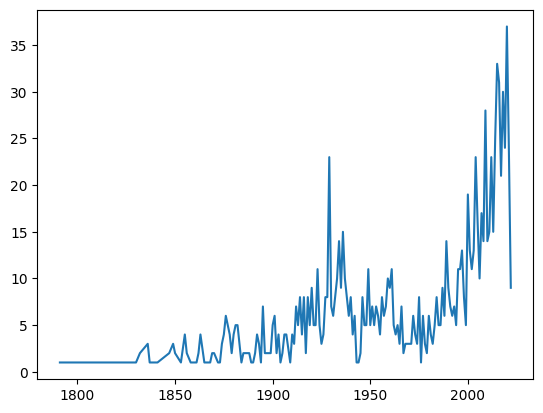

In [92]:
# Graph the number of bites per year.
df.incident_year.value_counts().sort_index(ascending=False).plot(x='incident_year')

#I tried multiple things here but nothing feels right

<AxesSubplot: >

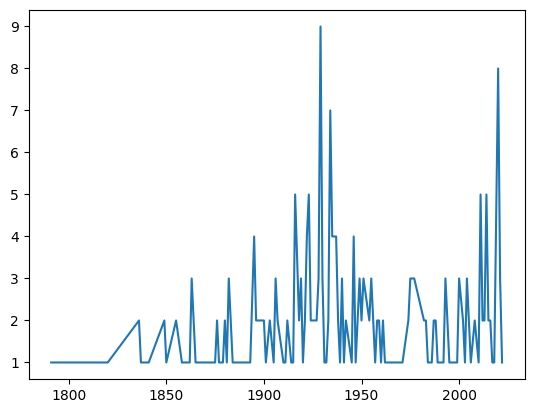

In [93]:
# Graph the number of data bites for each year.

df_fatal.incident_year.value_counts().sort_index().plot()

In [2]:
##INJURY DATA QUESTIONS

In [5]:
df = pd.read_csv('injurydat-cleaned.csv')

In [9]:
# How many shark bites are there in the data set?
#There are 1203 shark bites in this data set
df.shape

(1204, 18)

In [13]:
# What shark species was involved in the most bites?
#White sharks
df.shark_common_name.value_counts().head(1)

white shark    360
Name: shark_common_name, dtype: int64

In [16]:
# What shark species was involved in the most fatal bites?
#White sharks
df[df.victim_injury == 'fatal'].shark_common_name.value_counts()

white shark     91
tiger shark     86
bull shark      63
whaler shark     5
Name: shark_common_name, dtype: int64

In [18]:
# Were more women or men involved in shark attacks?
#More men were involved in shark attacks
df.victim_gender.value_counts()

male      1060
female     117
32           1
47           1
Name: victim_gender, dtype: int64

In [21]:
# What is the average length of sharks involved in bites?
#Average length of sharks involved in bites is 2.7 m.
df.shark_length_m.mean().round(2)

2.7

In [31]:
# What is the average length of a shark involved in non-fatal bites as compared to that of fatal bites?
#df.victim_injury = df.victim_injury.str.replace('I', 'i')

df.groupby('victim_injury').shark_length_m.mean().round(2)

victim_injury
fatal        3.84
injured      2.26
uninjured    2.95
Name: shark_length_m, dtype: float64

In [32]:
# What is the average length of a shark involved in bites that were provoked 
#as compared to that of bites that were unprovoked?
df.head()

df.groupby('provoked_unprovoked').shark_length_m.mean().round(2)

provoked_unprovoked
provoked      2.56
unprovoked    2.77
Name: shark_length_m, dtype: float64

In [50]:
# Are the types of sharks involves in swimming and surfing bites different than those involved in diving bites?
df.head()

df[df.victim_activity == 'swimming'].shark_common_name.value_counts()

bull shark                   140
tiger shark                   98
white shark                   92
wobbegong                     63
whaler shark                  20
lemon shark                    4
dusky shark                    2
blacktip reef shark            2
galapagos shark                2
unknown                        1
wobbeogong                     1
bronze whaler shark            1
whitetip reef shark            1
shortfin mako shark            1
school shark                   1
dogfish                        1
broadnose sevengill shark      1
grey nurse shark               1
Name: shark_common_name, dtype: int64

In [51]:
df[df.victim_activity == 'surfing'].shark_common_name.value_counts()

wobbegong     1
bull shark    1
unknown       1
Name: shark_common_name, dtype: int64

In [52]:
df[df.victim_activity == 'diving'].shark_common_name.value_counts()

wobbegong              32
white shark            32
tiger shark             9
whaler shark            5
grey reef shark         3
whitetip reef shark     2
bronze whaler shark     2
hammerhead shark        1
grey nurse shark        1
sevengill shark         1
bull shark              1
port jackson shark      1
Name: shark_common_name, dtype: int64

In [54]:
# Are the types of sharks involved in fatal bites different than those involved in non-fatal bites?
#More wobbegong sharks are involved in injuries while white, tiger, and bull sharks are involved 
#in fatal as well as non-fatal sharks.
df.groupby('victim_injury').shark_common_name.value_counts()

victim_injury  shark_common_name        
fatal          white shark                   91
               tiger shark                   86
               bull shark                    63
               whaler shark                   5
injured        wobbegong                    190
               white shark                  167
               tiger shark                  113
               bull shark                   107
               whaler shark                  48
               bronze whaler shark           14
               grey nurse shark               8
               grey reef shark                7
               whitetip reef shark            7
               lemon shark                    5
               blacktip reef shark            3
               galapagos shark                3
               hammerhead shark               3
               broadnose sevengill shark      2
               dusky shark                    2
               tiger shark                    2